In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# Load the dataset
df = pd.read_csv("/content/squat_exercise_cleaned.csv")
df

,Timestamp,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Knee_Angle,Pressure,Label,Squat_Type,Subject_ID,Feedback_Message
0,5.731760,-0.147307,-0.226143,9.597007,-0.047119,-0.002570,0.046046,67.163500,0.734286,correct,full_squat,2,Great job! You're doing a perfect full squat. ...
1,9.498060,-0.085135,0.113930,9.566146,-0.023645,-0.010848,-0.032984,80.669253,0.801387,correct,full_squat,3,Great job! You're doing a perfect full squat. ...
2,4.626818,-0.180873,0.133339,9.927485,-0.009509,-0.079351,0.038444,58.639685,0.488638,correct,slow_squat,5,Controlled and steady! That slow squat was exc...
3,9.238477,0.035508,-0.005087,10.896361,0.071911,-0.045082,-0.052250,32.075140,0.662619,incorrect,wrong_knee_in,4,Incorrect: Your knees are collapsing inward. P...
4,7.855711,-0.161357,-0.347519,8.661827,0.005501,-0.119691,-0.047142,53.659905,0.929920,correct,half_squat,2,Nice half squat! You're on the right track. St...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,6.098167,0.160150,-0.046103,10.754569,-0.044662,-0.013119,-0.017997,33.748251,0.748958,incorrect,full_squat,1,Incorrect: You are not going deep enough. Try ...
4259,6.970901,0.010847,0.050909,9.813353,-0.029099,-0.033827,0.045810,30.898640,0.762037,incorrect,full_squat,1,Incorrect: You are not going deep enough. Try ...
4260,9.338677,-0.012020,0.055107,9.895566,0.061699,0.034498,-0.029482,39.386141,0.613910,incorrect,full_squat,1,Incorrect: You are not going deep enough. Try ...
4261,7.676473,0.030652,-0.036509,9.759724,-0.032438,-0.047026,-0.025134,85.708225,0.770559,incorrect,wrong_knee_in,3,Incorrect: Your knees are collapsing inward. P...


In [4]:
# Show basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         4263 non-null   float64
 1   Acc_X             4263 non-null   float64
 2   Acc_Y             4263 non-null   float64
 3   Acc_Z             4263 non-null   float64
 4   Gyro_X            4263 non-null   float64
 5   Gyro_Y            4263 non-null   float64
 6   Gyro_Z            4263 non-null   float64
 7   Knee_Angle        4263 non-null   float64
 8   Pressure          4263 non-null   float64
 9   Label             4263 non-null   object 
 10  Squat_Type        4263 non-null   object 
 11  Subject_ID        4263 non-null   int64  
 12  Feedback_Message  4263 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 433.1+ KB
None


In [6]:
# Drop unnecessary columns (including Timestamp and Subject_ID)
df_cleaned = df.drop(columns=["Timestamp", "Subject_ID"])

# Initialize LabelEncoders
label_encoder = LabelEncoder()
squat_type_encoder = LabelEncoder()

# Encode 'Label' and 'Squat_Type'
df_cleaned['Label'] = label_encoder.fit_transform(df_cleaned['Label'])
df_cleaned['Squat_Type'] = squat_type_encoder.fit_transform(df_cleaned['Squat_Type'])

# Optional: Save the cleaned dataset
df_cleaned.to_csv("squat_data_cleaned_encoded.csv", index=False)
print(df_cleaned.head())

# Link each Squat_Type to its Feedback_Message
squat_feedback_map = df[['Squat_Type', 'Feedback_Message']].drop_duplicates().set_index('Squat_Type')['Feedback_Message'].to_dict()
df_cleaned['Feedback_Message'] = df['Squat_Type'].map(squat_feedback_map)


      Acc_X     Acc_Y      Acc_Z    Gyro_X    Gyro_Y    Gyro_Z  Knee_Angle  \
0 -0.147307 -0.226143   9.597007 -0.047119 -0.002570  0.046046   67.163500   
1 -0.085135  0.113930   9.566146 -0.023645 -0.010848 -0.032984   80.669253   
2 -0.180873  0.133339   9.927485 -0.009509 -0.079351  0.038444   58.639685   
3  0.035508 -0.005087  10.896361  0.071911 -0.045082 -0.052250   32.075140   
4 -0.161357 -0.347519   8.661827  0.005501 -0.119691 -0.047142   53.659905   

   Pressure  Label  Squat_Type  \
0  0.734286      0           0   
1  0.801387      0           0   
2  0.488638      0           2   
3  0.662619      1           4   
4  0.929920      0           1   

                                    Feedback_Message  
0  Great job! You're doing a perfect full squat. ...  
1  Great job! You're doing a perfect full squat. ...  
2  Controlled and steady! That slow squat was exc...  
3  Incorrect: Your knees are collapsing inward. P...  
4  Nice half squat! You're on the right track. St..

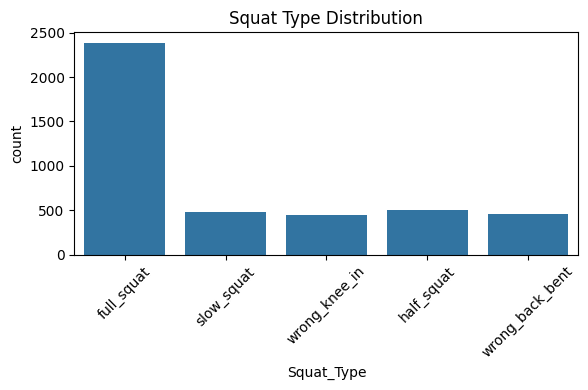

In [7]:
# Squat type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Squat_Type')
plt.title('Squat Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

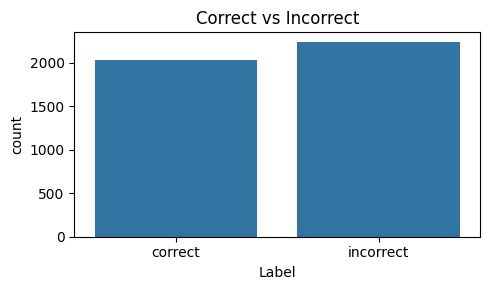

In [9]:
# Correct vs incorrect (Label)
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Label')
plt.title('Correct vs Incorrect')
plt.tight_layout()
plt.show()


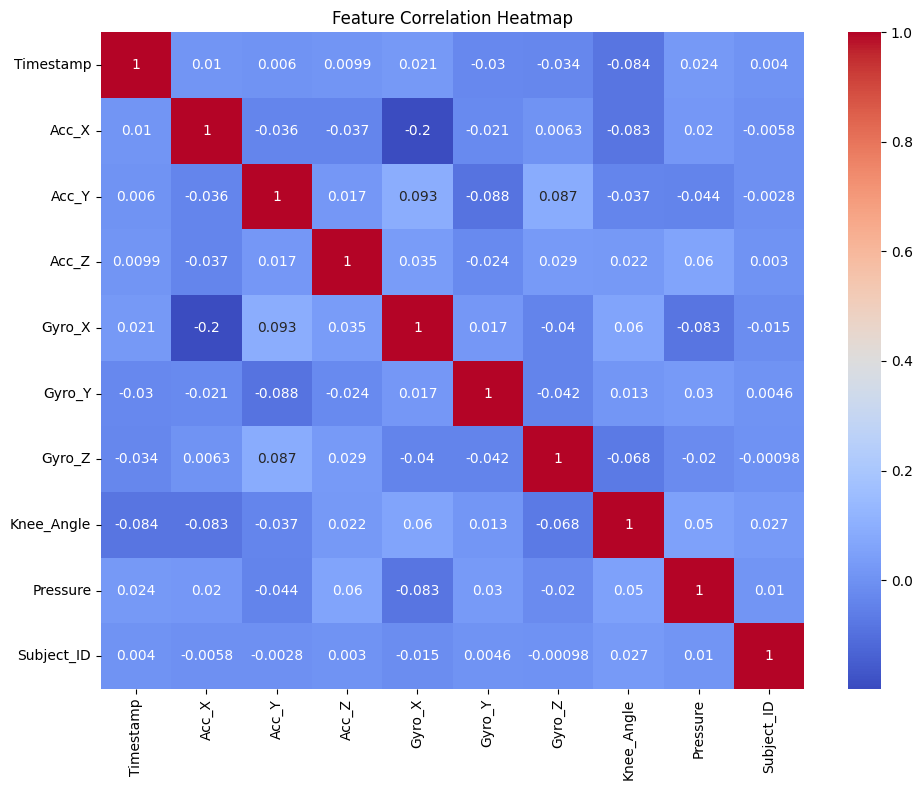

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [12]:
# Feature-target split
X = df_cleaned.drop(columns=['Label', 'Squat_Type', 'Feedback_Message'])
y = df_cleaned['Label']

# Time-aware train-test split (80%-20%)
split_index = int(len(df_cleaned) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [13]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9730363423212193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       408
           1       0.98      0.97      0.97       445

    accuracy                           0.97       853
   macro avg       0.97      0.97      0.97       853
weighted avg       0.97      0.97      0.97       853



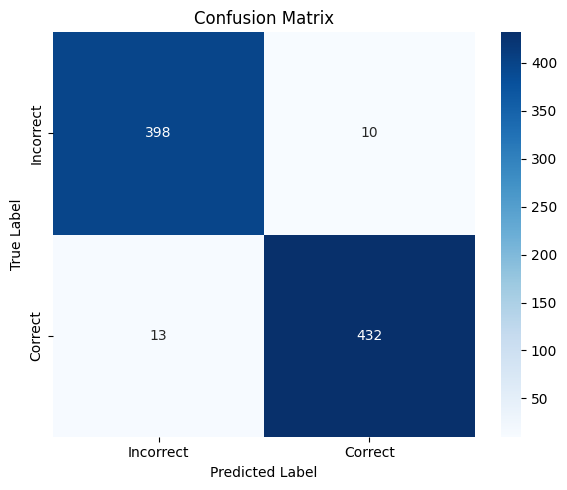

In [14]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Incorrect', 'Correct']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


<ipython-input-15-387b713bf160>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


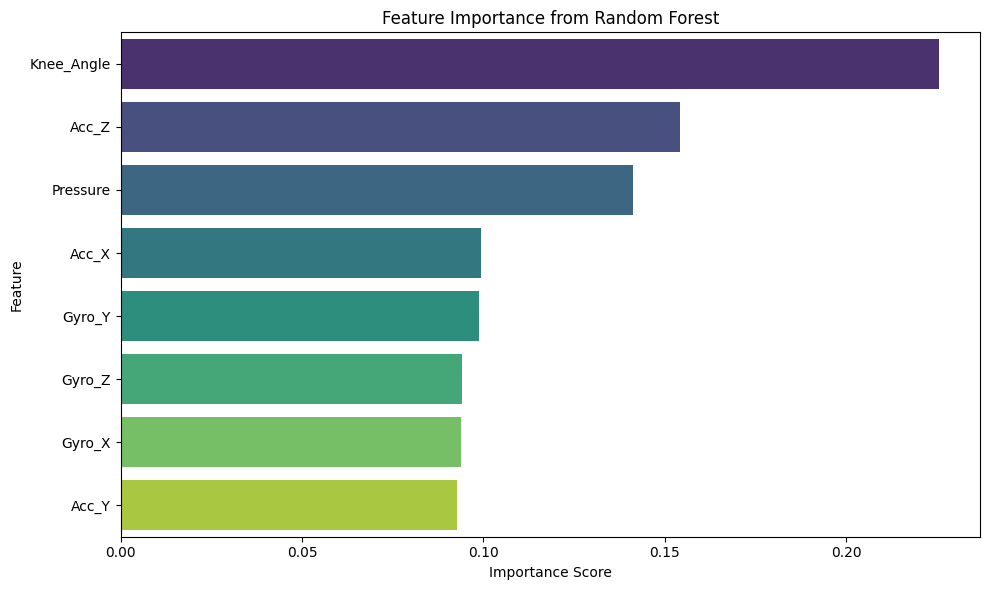

In [15]:
# Assume model is already trained and X_train is available
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [16]:
import joblib

# Save the model
joblib.dump(model, 'squat_rf_model.pkl')
print("✅ Model saved as squat_rf_model.pkl")


✅ Model saved as squat_rf_model.pkl
